In [1]:
%pylab inline
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cPickle as pickle
dt = 1/20000 #20kHz sampling rate

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [6]:
PNdata = pickle.load(open('PNdata.pkl','rb'))
pulse_labels = pickle.load(open('pulselabelsPN.pkl','rb'))

In [7]:
def local_maxima(d):
    '''
    returns bool array with the same shape as `d` with elemets at the position of local maxima in `d` are set to `True`
    this function simply checks if the neighbouring elements are smaller or equal and is __sensitive to noise__
    '''
    return r_[True, d[1:] >= d[:-1]] & r_[d[:-1] > d[1:], True]

In [18]:
stim_start = 1 #seconds
stim_end   = 5 #seconds

idx_stim_start = int(stim_start/dt)
idx_stim_end =   int(stim_end/dt)

th = 0 # use threshold of 0 mV for AP detection. the AP waveform is not very noise so the below works

number_of_datasets = 5


Firing_Rates = [[] for x in xrange(number_of_datasets)]

for dataset in range(number_of_datasets):
    number_of_pulses = len(pulse_labels[dataset])
    for i in range(number_of_pulses):
        V = PNdata[dataset][i]
        V_maxima = (local_maxima(V) & (V>th))
        indices = V_maxima.nonzero()[0]
        Firing_Rates[dataset].append(int(len(indices))/(stim_end-stim_start))    


[[0.0, 0.0, 0.0, 0.0, 5.25, 10.5, 15.0, 25.25], [0.0, 1.0, 7.5, 9.25, 13.0], [0.0, 0.0, 0.0, 3.75, 8.0, 11.25, 13.0], [0.0, 0.0, 4.25, 6.0, 5.0, 5.25, 9.0, 11.0], [0.0, 0.0, 3.0, 8.25, 12.75]]


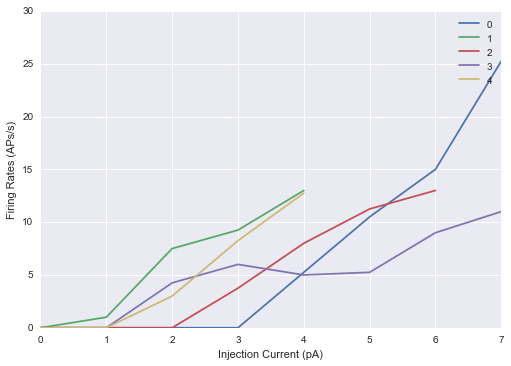

In [45]:
fig = figure()

ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_ylabel('Firing Rates (APs/s)')
ax.set_xlabel('Injection Current (pA)')

for dset in range(number_of_datasets):
    current = numpy.arange(len(Firing_Rates[dset]))
    
    ax.plot(current,Firing_Rates[dset],label = dset)
ax.legend()

show()
